### Hierarchical Clustering Implementation

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import load_iris

In [2]:
iris=load_iris()

In [3]:
iris_data=pd.DataFrame(iris.data)

In [7]:
iris_data.columns=iris.feature_names

In [8]:
iris_data.head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2


#### In heirachical clustering it is a better practice to standardized our dataset

In [9]:
# standard scaler
from sklearn.preprocessing import StandardScaler
scaler=StandardScaler()

In [13]:
X_scaled=scaler.fit_transform(iris_data)

In [15]:
# X_scaled

In [16]:
X_scaled.shape  # our dataset has 4 features 

(150, 4)

#### We have 4 features, we cannot visualize 4 features so we will use pca to convert 4 features into 2

In [17]:
from sklearn.decomposition import PCA

In [18]:
pca=PCA(n_components=2)

In [20]:
pca_scaled=pca.fit_transform(X_scaled)

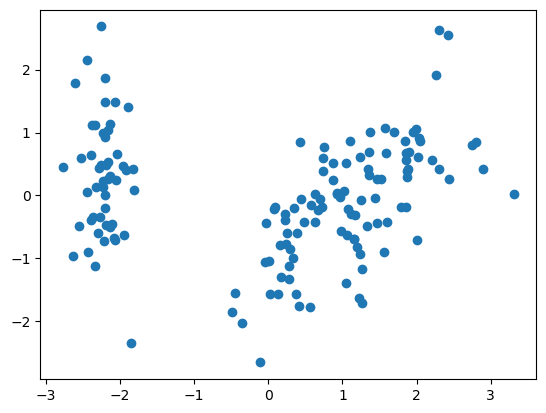

In [22]:
plt.scatter(pca_scaled[:,0],pca_scaled[:,1])

#### we will do Agglomerative clustering for above data
we will find the nearest dataset and form their clusters and then repeat till one single cluster is formed. We fill find the longest vertical line that is not cut by any horital lines, respective intersecting point will give the k value 

#### for Dendogram

Text(0, 0.5, 'Euclidean distance')

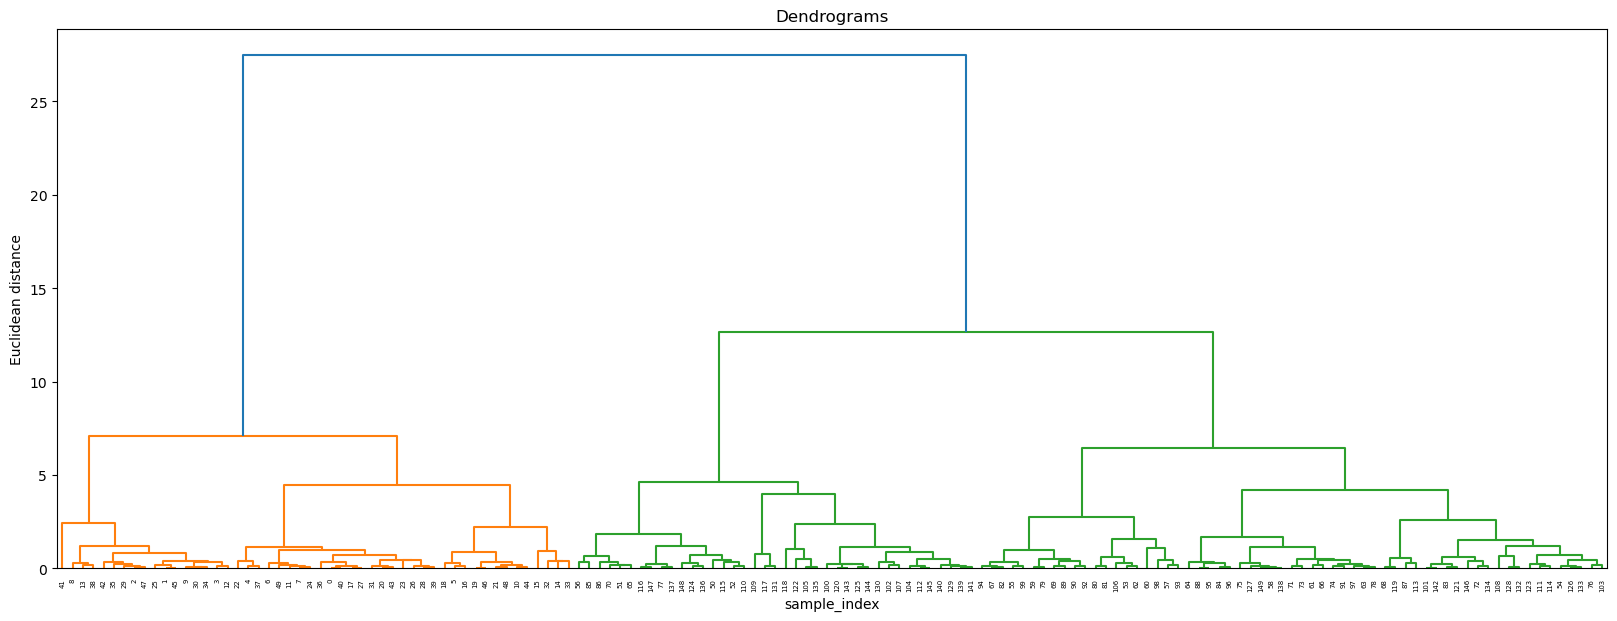

In [27]:
import scipy.cluster.hierarchy as sc
# plot the dendrogram
plt.figure(figsize=(20,7))
plt.title('Dendograms')

# create dandograms 
sc.dendrogram(sc.linkage(pca_scaled,method='ward'))
plt.title('Dendrograms')
plt.xlabel('sample_index')
plt.ylabel('Euclidean distance')

#### Since it is passing through 2 points so we will have 2 clusters

In [31]:
from sklearn.cluster import AgglomerativeClustering
cluster=AgglomerativeClustering(n_clusters=2,affinity='euclidean',linkage='ward')
cluster.fit(pca_scaled)

/opt/conda/lib/python3.10/site-packages/sklearn/cluster/_agglomerative.py:983: FutureWarning: Attribute `affinity` was deprecated in version 1.2 and will be removed in 1.4. Use `metric` instead
  warnings.warn(


AgglomerativeClustering(affinity='euclidean')

In [32]:
cluster.labels_  # we haev 2 clusters that why 2 value of label

array([1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0])

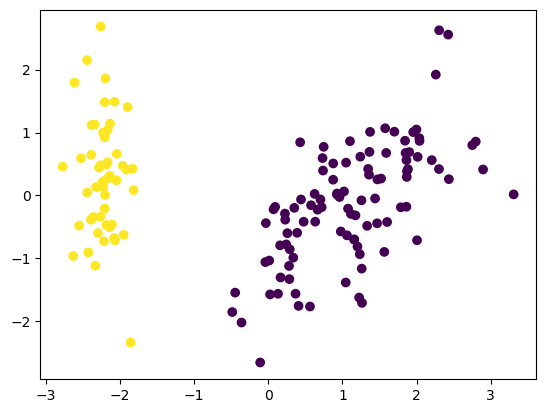

In [35]:
plt.scatter(pca_scaled[:,0],pca_scaled[:,1],c=cluster.labels_)

In [36]:
from sklearn.metrics import silhouette_score

In [39]:
silhouette_coefficients=[]
for k in range(2,11):
    agglo=AgglomerativeClustering(n_clusters=k,affinity='euclidean',linkage='ward')
    agglo.fit(X_scaled)
    score=silhouette_score(X_scaled,agglo.labels_)
    silhouette_coefficients.append(score)

/opt/conda/lib/python3.10/site-packages/sklearn/cluster/_agglomerative.py:983: FutureWarning: Attribute `affinity` was deprecated in version 1.2 and will be removed in 1.4. Use `metric` instead
  warnings.warn(
/opt/conda/lib/python3.10/site-packages/sklearn/cluster/_agglomerative.py:983: FutureWarning: Attribute `affinity` was deprecated in version 1.2 and will be removed in 1.4. Use `metric` instead
  warnings.warn(
/opt/conda/lib/python3.10/site-packages/sklearn/cluster/_agglomerative.py:983: FutureWarning: Attribute `affinity` was deprecated in version 1.2 and will be removed in 1.4. Use `metric` instead
  warnings.warn(
/opt/conda/lib/python3.10/site-packages/sklearn/cluster/_agglomerative.py:983: FutureWarning: Attribute `affinity` was deprecated in version 1.2 and will be removed in 1.4. Use `metric` instead
  warnings.warn(
/opt/conda/lib/python3.10/site-packages/sklearn/cluster/_agglomerative.py:983: FutureWarning: Attribute `affinity` was deprecated in version 1.2 and will be

In [40]:
silhouette_coefficients

[0.5770346019475988,
 0.4466890410285909,
 0.4006363159855973,
 0.33058726295230545,
 0.31485480100512825,
 0.316969830299128,
 0.310946529007258,
 0.31143422475471655,
 0.3161120375980681]

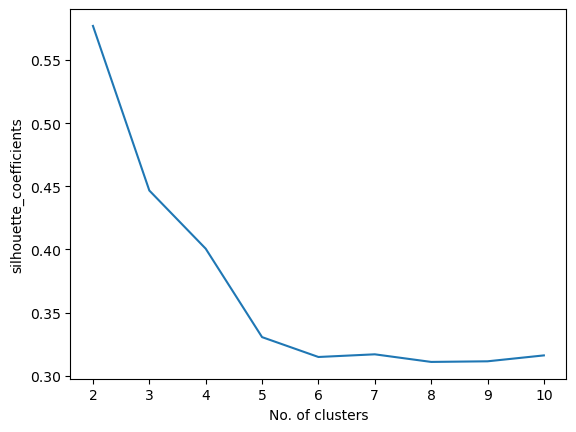

In [41]:
plt.plot(range(2,11),silhouette_coefficients)
plt.xlabel('No. of clusters')
plt.ylabel('silhouette_coefficients')
plt.show()

### Observation :
for k=2 there is highest sillhoutte_coeff value